# STEP1: IDENTIFYING PROBLEM STATEMENT

Many social programs have a hard time ensuring that the right people are given enough aid. It's tricky when a program focuses on the poorest segment of the population. This segment of the population can't provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called "Proxy Means Test" uses an algorithm to verify Income Qualification. With PMT, agencies use a model that considers the family's observable household attributes like the material of the walls and ceiling or the assests in their homes to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region's population grows and poverty decilnes.

The Inter-American Development Bank also believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT's performance.


### Following actions should be performed:

1. Identify the output variable.
2. Understand the type of data.
3. Check if there are any biases in your dataset.
4. Check whether all members of the house have the same poverty level.
5. Check if there is a house without a family head.
6. Set poverty level of the members and the head of the house within a family.
7. Count how many null values are existing in columns.
8. Remove null value rows of the target variable.
9. Predict the accuracy using random forest classifier.
10. Check the accuracy using random forest with cross validation.

#  ============================================================


### After reading the Problem Statement itself, we should be able to find what kind of problem statement it was all about.

This is a supervised multi-class classification machine learning problem:

* Supervised: provided with the labels for the training data
* Multi-class classification: Labels are discrete values with 4 classes

Each row represents one individual and each column is a feature, either unique to the individual, or for the household of the individual. The training set has one additional column, Target, which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.


# ============================================================

# STEP 2: UNDERSTANDING THE WEIGHTAGE OF PROBLEM STATEMENT  AND CONVERTING THE BUSINESS PROBLEM INTO A DATA SCIENCE PROBLEM STATEMENT

Before we look into the dataset, its the responsibility of every Data scientists to go to the environment to understand the exact weightage of the Problem Statement. Today we all have everything at our fingertips. If we just google for something, it's going to give the complete history. So, first let's understand "What is Costa Rica all about? What is IDB? What is Proxmy Means Test? What is the Focus of majority of the social programs to help Costa Rica?"

Let's understand now. 

## Costa Rica

Costa Rica which is one of the wealthiest countries in Central America, but a slum in the capital of San Jose, known as Carpio. This place is even ignored by the society since the district is synonymous with poverty, drugs and violence.As per a report by the National Statistics and Census Institute (INEC) in 2015, more than 1.1 million Costa Ricans lived in poverty, According to data from the National Household Survey of the National Institute of Statistics and Census, the percentage of poor households in Costa Rica went from 20.5 to 20 percent between 2016 and 2017, and extreme poverty dropped from 6.3 percent to 5.7 percent.


## IDB

The Inter-American Development Bank (IDB) is a cooperative development bank founded in 1959 to accelerate the economic and social development of its Latin American and Caribbean member countries.


## Proxy Means Test

In any social program, it is always tough to make sure that the aid goes to the deserving. The poorest segment of the population usually is unable to provide the necessary income and expense records to prove that they qualify. This is where proxy means testing (PMT) comes into the picture. The key idea is to use observable characteristics of the household or the members to estimate their incomes or consumption, when other income data (salary slips, tax returns) are unavailable or sketchy. 

## What I have to do?

I need to identify the "level of income qualification" needed for the families in Latin America and also to maximize the Accuracy score across all the categories. A generalized solution would be helpful to IDB and other institutions working towards helping the economically weaker sections of the society.

# ============================================================

# STEP3: IDENTIFYING DATA SOURCES AND DATA UNDERSTANDING 

### 3.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import pandas as pd
import numpy as np 
import chart_studio.plotly as py
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

### 3.2 Importing Dataset 

In [76]:
train_data = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")

### 3.3 Exploring Train and Test dataset

In [3]:
print ("Train Dataset - Rows, Columns: ", train_data.shape)
print ("Test Dataset  - Rows, Columns: ", test_data.shape)

Train Dataset - Rows, Columns:  (9557, 143)
Test Dataset  - Rows, Columns:  (23856, 142)


In [4]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
train_data.shape

(9557, 143)

In [77]:
train_data['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [7]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [9]:
test_data.shape

(23856, 142)

### OBESERVATION:

Looking at the train and test dataset we noticed that the following:

Train dataset:
Rows: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
Column dtypes: float64(8), int64(130), object(5)

Test dataset:
Rows: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)

The important piece of information here is that we don’t have ‘Target’ feature in Test Dataset. There are 5 object type, 130(Train set)/ 129 (test set) integer type and 8 float type features. Lets look at those features next.

### 3.4 Understanding the column variables

We have seen that, we are provided with Train and Test dataset which is almost same except the absence of 'Target' variable in the Test dataset. Now, let's understand all the feature by looking at its datatype from Train dataset.  

In [10]:
print('Integer Type: ')
print(train_data.select_dtypes(np.int64).columns)
print('\n')

print('Float Type: ')
print(train_data.select_dtypes(np.float64).columns)
print('\n')

print('Object Type: ')
print(train_data.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


### Note:

Till now, we have explored the train and test datasets. Now, we know that the data whatever we are provided with might not be in a proper shape where most of the times, the data would be messy. So, we have to make sure that the data should be in an amazing form and shape before we build the model or else our model's accuracy will go for a toss and it would be useless.

Therefore, let's deep dive into the complete data and make it ready for Model building.

# ============================================================

## STEP 4: EXPLORATORY DATA ANALYSIS(EDA)

### DATA CLEANING - DATA PREPARATION - DATA TRANSFORMATION

### 4.1 Checking missing values for Entire train dataset

In [11]:
print ("Top Columns having missing values")
missmap = train_data.isnull().sum().to_frame()
missmap = missmap.sort_values(0, ascending = False)
missmap.head()

Top Columns having missing values


,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


### 4.1.1 Overall Percentage of null values Column-wise

In [12]:
per_null_train = train_data.isnull().sum().sort_values(0, ascending = False)/(train_data.shape[0])*100
print(per_null_train.head())

rez_esc      82.954902
v18q1        76.823271
v2a1         71.779847
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64


### 4.2 Data Preparation

Let's apply our commonsense for Data Cleaning. Data Cleaning has to to be approached by looking at the datatypes first of all.
Here we are able to see 5 columns with null values in the entire dataset. Let's look into the datatypes and apply our commonsense to fill the null values to transform the dataset in a proper form and shape.

Fields with missing values:

     rez_esc    =  Years behind in school

     v18q1      =  Number of tablets household owns

     v2a1       =  Monthly rent paymen
    
     meaneduc   =  Average years of education for adults (18+)

     SQBmeaned  =  Square of the mean years of education of adults (>=18) in the household


### 4.2.1 Let's explore the null values with respect to datatypes

#### 4.2.1.1 Any null value in Integer datatype variables?

In [13]:
train_data.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [14]:
null_counts=train_data.select_dtypes('int64').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

#### 4.2.1.2 Any null value in float datatype variables? 

In [15]:
train_data.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [16]:
null_counts=train_data.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

#### 4.2.1.3 Any null value in the object datatype variables? 

In [17]:
train_data.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [18]:
#Find columns with null values
null_counts=train_data.select_dtypes('object').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

## OBSERVATION:

Looking at the different types of data and null values for each feature. We found the following: 

1. No null values for Integer type features. 

2. No null values for Object type features. 

3. But for Float types, we have observed the null values. And they are 


     rez_esc    =  Years behind in school

     v18q1      =  Number of tablets household owns

     v2a1       =  Monthly rent payment
    
     meaneduc   =  Average years of education for adults (18+)

     SQBmeaned  =  Square of the mean years of education of adults (>=18) in the household

### 4.3 Data Transformation

Motive : To make the entire dataset in a proper form and shape to fed into the model for best prediction.

#### Before treating the null value, it is good to check is there any mixed values in any column. It is known that if there is any mixed values in should be in 'object datatype'.

The object datatypes are :

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

In [19]:
# Object datatypes:

print('Object Type: ')
print(train_data.select_dtypes(np.object).columns)

Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


### 4.3.1 Let's also fix the column with mixed values, if there's any.

In [20]:
train_data['Id'].value_counts()

ID_84e4721d4    1
ID_90f0db8b9    1
ID_e5fcc8bda    1
ID_a2aa2c6c5    1
ID_2e489189e    1
               ..
ID_7e513a2ad    1
ID_0741bb9cd    1
ID_118150b9d    1
ID_877d9a4a4    1
ID_f1fe0dbb5    1
Name: Id, Length: 9557, dtype: int64

In [21]:
train_data['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
4476ccd4c    11
6b35cdcf0    11
             ..
8161a5155     1
3d56274f9     1
d5471169a     1
1bc617b23     1
60fcd83c7     1
Name: idhogar, Length: 2988, dtype: int64

In [22]:
train_data['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
3.5            18
.80000001      18
1.25           18
2.25           13
.71428573      12
1.75           11
.83333331      11
.22222222      11
1.2            11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [23]:
train_data['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [24]:
train_data['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

## Observation:

Looking at the above results, we are able to see that there are 3 Object datatypes with mixed values. And they are,

['dependency','edjefe','edjefa']


According to the documentation for these columns:

* dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)


* edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0


* edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

For these three variables, it seems “yes” = 1 and “no” = 0. We can correct the variables using a mapping and convert to floats.

In [25]:
mapping={'yes':1,'no':0}

for df in [train_data, test_data]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)

In [26]:
# Recheck once for Object datatype

print('Object Type: ')
print(train_data.select_dtypes(np.object).columns)

Object Type: 
Index(['Id', 'idhogar'], dtype='object')


In [27]:
pd.set_option('max_columns', None)

In [28]:
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,1.149550,5.096788,2.896830,9.231523,0.134666,0.170556,0.20

### 4.3.2 Lets fix the column with null values

### 4.3.2.1 Null value treatment for 'rez_esc' column - Years behind school

In [29]:
train_data['rez_esc'].value_counts()

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

#### 'rez_esc'  - years behind in school. For the families with a null value, is possible that they have no children currently in school. Let's test this out by finding the ages of those who have a missing value in this column and the ages of those who do not have a missing value.

In [30]:
# Columns related to 'rez_esc' = Years behind in school is 'Age' = Age in years.
# Lets look at the data with not null values first.

train_data[train_data['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [31]:
#From the above, we see that when min age is 7 and max age is 17 for Years, then the 'behind in school' column has a value.
#Lets confirm
train_data.loc[train_data['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

## Statement:

Anyone younger than 7 or older than 17 is presumably has no years behind and therefore the value should be set to 0. For this variable, if the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero.

### Cross Checking once if there's any null value when the age is between 7 and 17 with respect to null values of 'years behind school' column

In [32]:
train_data.loc[(train_data['rez_esc'].isnull() & ((train_data['age'] > 7) & (train_data['age'] < 17)))]['age'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

There is one value that has Null for the 'behind in school' column with age between 7 and 17 with the age 10. Let's find the
complete record of this household.

In [33]:
train_data[(train_data['age'] ==10) & train_data['rez_esc'].isnull()].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,1,1,1,1,2,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0369a5d78,1,2,0,3,0.5,11.0,0.0,13.5,1,0,0,0,0,0,0,0,0,2,1.5,0,1,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,10,0,100,9,121,1,2.25,0.25,182.25,100,4


In [34]:
#from above we see that  the 'behind in school' column has null values 
# Lets use the above to fix the data
for df in [train_data, test_data]:
    df['rez_esc'].fillna(value=0, inplace=True)

train_data['rez_esc'].isnull().sum()

0

### 4.3.2.2 Null Value treatment for 'v18q1' column (total nulls: 7342) -  Number of tablets household owns

It is fair to say that if a household owns a tablet, then the count would be some number, if not the count would be zero.

In our dataset, we have column 'v18q' which indicates - whether or not household owns a tablet.

Since, we are seeing the things from the household perspective, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household. 

* 'parentesco1', =1 if household head

In [35]:
# Heads of household
heads = train_data.loc[train_data['parentesco1'] == 1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

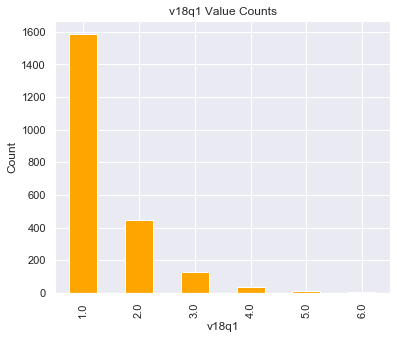

In [36]:
plt.figure(figsize = (6, 5))
col='v18q1'
train_data[col].value_counts().sort_index().plot.bar(color = 'orange')
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts')
plt.ylabel('Count')
plt.show()

In [37]:
#Looking at the above data it makes sense that when owns a tablet column is 0, there will be no number of tablets 
#household owns.
#Lets add 0 for all the null values.
for df in [train_data, test_data]:
    df['v18q1'].fillna(value=0, inplace=True)

train_data['v18q1'].isnull().sum()

0

### 4.3.2.3 Null Value treatment for 'v2a1' (total nulls: 6860)  =  Monthly Rent Payment

Why only the null values? Lets look at few rows with nulls in v2a1

Columns related to  Monthly rent payment are listed down:

 * tipovivi1, =1 own and fully paid house
 
 * tipovivi2, "=1 own,  paying in installments"

 * tipovivi3, =1 rented
 
 * tipovivi4, =1 precarious 
 
 * tipovivi5, "=1 other(assigned,  borrowed)"

In [38]:
data = train_data[train_data['v2a1'].isnull()].head()
data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2,ID_68de51c94,NaN,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
13,ID_064b57869,NaN,0,4,0,1,1,1,1.0,0,1,1,0,1,1,0,2,2,2,2,4,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,c51f9c774,0,2,1,2,1.00,0.0,4.0,9.50,0,1,0,0,0,0,0,0,0,2,1.000000,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,79,16,6241,4,0,0,1.000000,1.0000,90.2500,6241,4
14,ID_5c837d8a4,NaN,0,4,0,1,1,1,1.0,0,1,1,0,1,1,0,2,2,2,2,15,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,c51f9c774,0,2,1,2,1.00,0.0,4.0,9.50,0,0,0,0,0,0,0,1,0,2,1.000000,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,39,225,1521,4,0,0,1.000000,1.0000,90.2500,1521,4
26,ID_e5cdba865,NaN,0,5,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,15,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e84a2ac8,0,1,0,1,0.00,15.0,0.0,15.00,0,0,0,0,0,0,0,1,0,2,0.500000,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,44,225,1936,1,225,0,0.250000,0.0000,225.0000,1936,4
32,ID_e24d9c3c9,NaN,0,5,0,1,1,0,0.0,0,4,4,0,1,1,0,5,5,5,5,1,0.0,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,cb6bb28dd,1,4,0,5,0.25,11.0,0.0,5.25,0,1,0,0,0,0,0,0,0,3,1.666667,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,1,0,28,1,784,25,121,1,2.777778,0.0625,27.5625,784,4


In [39]:
columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']

data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


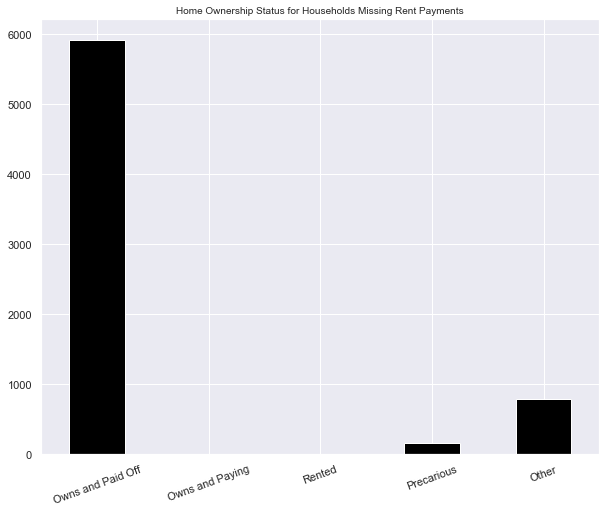

In [40]:
# Variables indicating home ownership
own_variables = [x for x in train_data if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payments
train_data.loc[train_data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),color = 'black')

plt.xticks([0, 1, 2, 3, 4],['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],rotation = 20)

plt.title('Home Ownership Status for Households Missing Rent Payments', size = 10);

In [41]:
#Looking at the above data it makes sense that when the house is fully paid, there will be no monthly rent payment.
#So, lets add 0 for all the null values.

for df in [train_data, test_data]:
    df['v2a1'].fillna(value=0, inplace=True)

train_data[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

### 4.3.2.4 Null Value treatment for 'meaneduc' (total nulls: 5)  =  Average years of education for adults (18+)

Let's look at the columns related to average years of education for adults (18+):  

* edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
  head of household and gender, yes=1 and no=0


* edjefa, years of education of female head of household, based on the interaction of escolari (years of education), 
  head of household and gender, yes=1 and no=0 


* instlevel1, =1 no level of education


* instlevel2, =1 incomplete primary 

In [42]:
data = train_data[train_data['meaneduc'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']

data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [43]:
#from the above, we find that meaneduc is null when no level of education is 0
#Lets fix the data
for df in [train_data, test_data]:
    df['meaneduc'].fillna(value=0, inplace=True)
    
train_data['meaneduc'].isnull().sum()

0

### 4.3.2.5 Null Value treatment for SQBmeaned (total nulls: 5)  =  Square of the mean years of education of adults (>=18) in the household 

This column is just the square of the mean years od education of adults.

In [44]:
data = train_data[train_data['SQBmeaned'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']

data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [45]:
#from the above, we find that SQBmeaned is null when no level of education is 0
#Lets fix the data
for df in [train_data, test_data]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
    
train_data['SQBmeaned'].isnull().sum()

0

Almost all the null values has ben treated properly inlines with the data understanding.

### Final Check: Let's look at the overall data.

In [46]:
null_counts = train_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

#  Null value treatement has been done successfully.

## =========================================================================

# EDA - CHECK IF DATASET IS BIASED?

Target, which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.

The Target values represent poverty levels as follows:

     1 = extreme poverty 

     2 = moderate poverty 

     3 = vulnerable households 

     4 = non vulnerable households

### Different Levels of Poverty Household Groups

In [47]:
target = train_data['Target'].value_counts().to_frame()
levels = ["NonVulnerable", "Moderate Poverty", "Vulnerable", "Extereme Poverty"]
trace = go.Bar(y=target.Target, x=levels, marker=dict(color='orange', opacity=0.6))
layout = dict(title="Household Poverty Levels", margin=dict(l=200), width=800, height=400)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Looking at the above bar chart, it is evident that we are dealing with an imbalanced class problem. There are many more households that classify as non vulnerable than in any other category. The extreme poverty class is the smallest when it should make us optimistic.

Hence, we can say that the dataset is biased.

## Note:

The raw data contains a mix of both household and individual characteristics. Therefore, for the individual data, we will have to find a way to aggregate this for each household. Some of the individuals belong to a household with no head of household which means that unfortunately we can't use this data for training.

Few columns to note:

* Id: a unique identifier for each individual, this should not be a feature that we use!


* idhogar: a unique identifier for each household. This variable is not a feature, but will be used to group individuals by household as all individuals in a household will have the same identifier.


* parentesco1: indicates if this person is the head of the household.


* Target: the label, which should be equal for all members in a household

### Lets see if records belonging to same household has same target/score

In [48]:
# Groupby the household and figure out the number of unique values
all_equal = train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [49]:
#Lets check one household
train_data[train_data['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [50]:
#Lets use Target value of the parent record (head of the household) and update rest. But before that lets check
# if all families has a head. 

households_head = train_data.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train_data.loc[train_data['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [51]:
# Find households without a head and where Target value are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


In [52]:
#Lets fix the data
#Set poverty level of the members and the head of the house within a family.
#Iterate through each household

for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train_data[(train_data['idhogar'] == household) & (train_data['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train_data.loc[train_data['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


### =======================================================================================

# EDA - DATA PREPARATION 

## Removing insignificant columns/features

### Lets look at the Squared Variables

‘SQBescolari’ - escolari squared

‘SQBage’ -  age squared

‘SQBhogar_total’ - hogar_total squared

‘SQBedjefe’ - edjefe squared

‘SQBhogar_nin’ - hogar_nin squared

‘SQBovercrowding’ - overcrowding squared

‘SQBdependency’ - dependency squared

‘SQBmeaned’ - square of the mean years of education of adults (>=18) in the
household

‘agesq’ - = Age squared

In [53]:
#Lets remove them - since they convey the similar meaning with the non-squared variables already present in the dataset.
#Anyone will do for model building.

print(train_data.shape)

cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']


for df in [train_data, test_data]:
    df.drop(columns = cols,inplace=True)

print(train_data.shape)

(9557, 143)
(9557, 134)


## Column Definitions

As a part of the analysis: we have to define the columns that are at an individual level and at a household level using the data descriptions. There is simply no other way to identify which variables at are the household level than to go through the variables themselves in the data description. 

We'll define different variables because we need to treat some of them in a different manner. Once we have the variables defined on each level, we can work to start aggregating them as needed.

The process is as follows

1. Break variables into household level and invididual level


2. Find suitable aggregations for the individual level data

    * Ordinal variables can use statistical aggregations

    * Boolean variables can also be aggregated but with fewer stats


3. Join the individual aggregations to the household level data

## Define Variable Categories

There are several different categories of variables:

1. Id variables: identifies the data and should not be used as features


2. Individual Variables: these are characteristics of each individual rather than the household

    * Boolean: Yes or No (0 or 1)

    * Ordered Discrete: Integers with an ordering


3. Household variables
    
    * Boolean: Yes or No

    * Ordered Discrete: Integers with an ordering
    
    * Continuous numeric
    
    
Below we manually define the variables in each category.

In [54]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

### Check for redundant household variables

In [55]:
heads = train_data.loc[train_data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [56]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [57]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


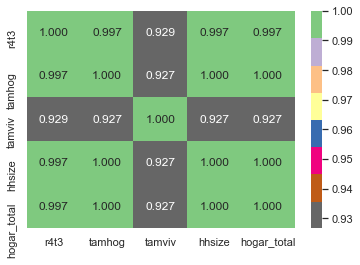

In [58]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

# Observations:

There are several variables here having to do with the size of the house:

* r4t3, Total persons in the household


* tamhog, size of the household


* tamviv, number of persons living in the household


* hhsize, household size


* hogar_total, # of total individuals in the household


* These variables are all highly correlated with one another.

In [59]:
cols=['tamhog', 'hogar_total', 'r4t3']

for df in [train_data, test_data]:
    df.drop(columns = cols,inplace=True)

train_data.shape

(9557, 131)

#### Check for redundant Individual variables

In [60]:
ind = train_data[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [61]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop


['female']

In [62]:
# This is simply the opposite of male! We can remove the male flag.
for df in [train_data, test_data]:
    df.drop(columns = 'male',inplace=True)

train_data.shape

(9557, 130)

In [63]:
#lets check area1 and area2 also
# area1, =1 zona urbana 
# area2, =2 zona rural 
# area2 redundant because we have a column indicating if the house is in a urban zone

for df in [train_data, test_data]:
    df.drop(columns = 'area2',inplace=True)

train_data.shape

(9557, 129)

In [64]:
#Finally lets delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [train_data, test_data]:
    df.drop(columns = cols,inplace=True)

train_data.shape

(9557, 127)

Now, the data is completely prepared and all the unwanted columns are removed. Now we are all set to build th model.

### =========================================================================================

## STEP 5 : APPLYING MACHINE LEARNING FOR MODEL BUILDING

### 5.1 Predict the accuracy using random forest classifier.

In [65]:
X_features=train_data.iloc[:,0:-1]
y_features=train_data.iloc[:,-1]
print(X_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

X_train,X_test,y_train,y_test=train_test_split(X_features,y_features,test_size=0.2,random_state=1)
rmclassifier = RandomForestClassifier()

In [67]:
rmclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
y_predict = rmclassifier.predict(X_test)

In [69]:
print("Accuracy Score: ",accuracy_score(y_test,y_predict))
print("\nActual Vs Predicted Result: \n\n", confusion_matrix(y_test,y_predict))
print("\nReport:\n",classification_report(y_test,y_predict))

Accuracy Score:  0.9492677824267782

Actual Vs Predicted Result: 

 [[ 133    3    0   21]
 [   0  290    1   26]
 [   0    1  191   41]
 [   0    3    1 1201]]

Report:
               precision    recall  f1-score   support

           1       1.00      0.85      0.92       157
           2       0.98      0.91      0.94       317
           3       0.99      0.82      0.90       233
           4       0.93      1.00      0.96      1205

    accuracy                           0.95      1912
   macro avg       0.97      0.89      0.93      1912
weighted avg       0.95      0.95      0.95      1912



In [70]:
y_predict_testdata = rmclassifier.predict(test_data)

In [71]:
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [72]:
y_predict_testdata.shape

(23856,)

### 5.2 Check the accuracy using random forest with cross validation.

In [73]:
from sklearn.model_selection import KFold,cross_val_score

#### 5.2.1 Checking the score using default 10 trees

In [74]:
kfold=KFold(n_splits=5,random_state=7,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,X_features,y_features,cv=kfold,scoring='accuracy'))

results=cross_val_score(rmclassifier,X_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


#### 5.2.2 Checking the score using 100 trees

In [75]:
rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,X_features,y_features,cv=kfold,scoring='accuracy'))

results=cross_val_score(rmclassifier,X_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


## OBSERVATION: Looking at the accuracy score, RandomForestClassifier with cross validation has the highest accuracy score of 94.60%.